In [27]:
from pydantic import BaseModel
from langgraph.graph import START, END, StateGraph

In [28]:
from typing_extensions import TypedDict


In [29]:
class stateschema(TypedDict):
    info:str

In [52]:
def start_play(state : stateschema):
    print("This is the start node")
    return {"info" : state['info'] + " going to play"}

def play_cric(state : stateschema):
    print("This is the play cricket node")
    return {"info" : state['info'] + " cricket"}

def play_badminton(state : stateschema):
    print("This is the play badminton node")
    return {"info" : state['info'] + " badminton"}

from datetime import datetime, time
from typing import Literal

def decide_play(state : stateschema) -> Literal["cricket", "badminton"]:
    now = datetime.now().time()

    if now > time(19, 0):  # 7:00 PM
        print("Time is greater than 7 PM")
        return "badminton"
    elif now > time(7, 0) and now < time(11, 0):  # Before 7:00 AM
        print("Time is between 7 and 11 AM")
        return "cricket"

In [53]:
from IPython.display import display, Image

graph = StateGraph(stateschema)
graph.add_node("START_play", start_play)
graph.add_node("cricket", play_cric)
graph.add_node("badminton", play_badminton)

graph.add_edge(START, "START_play")
graph.add_conditional_edges("START_play", decide_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton", END)

graphbuilder = graph.compile()

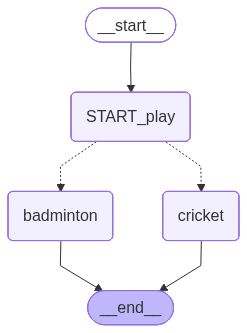

In [54]:
display(Image(graphbuilder.get_graph().draw_mermaid_png()))

In [60]:
graphbuilder.invoke({"info": "I am "})

This is the start node
Time is greater than 7 PM
This is the play badminton node


{'info': 'I am  going to play badminton'}

In [ ]:
print("hello")